In [1]:
# load back the model, we going to plot top words in the train set email
import pickle
with open('output/fittedmodel_decisionTree.pickle', 'rb') as fp:
    clf = pickle.load(fp)
    


In [19]:
import pandas as pd
dftrain = pd.read_csv("output/dftrain.csv")
X = dftrain.mergeAll
Y = dftrain.Area

# load back the train set data
import pandas as pd
from datetime import datetime
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.tree import export_graphviz
import subprocess

print("Processing Decisiontree")
currentTime = datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
print("Current time : {}".format(currentTime))
print()

# make corpus from X
corpus = []
for row in X:
    corpus.append(str(row))
    
# testing feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus) # no need to vectorize Y
XFeature = vectorizer.get_feature_names() 



# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'
                            
# fitting the model
clf = tree.DecisionTreeClassifier().fit(X,Y)

Processing Decisiontree
Current time : 2019-07-02-11:14:02



In [20]:
# save the model
import pickle
savename_text_clf = 'output/fittedmodel_decisionTree.pickle'
with open(savename_text_clf,'wb') as fp:
    pickle.dump(clf,fp)
    
endtime = datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
print('DONE! : {}'.format(endtime))

DONE! : 2019-07-02-11:14:05


In [21]:
# load back pickle
with open(savename_text_clf,'rb') as fp:
    clf = pickle.load(fp)

In [22]:
# add graphviz bin to path
import os
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz



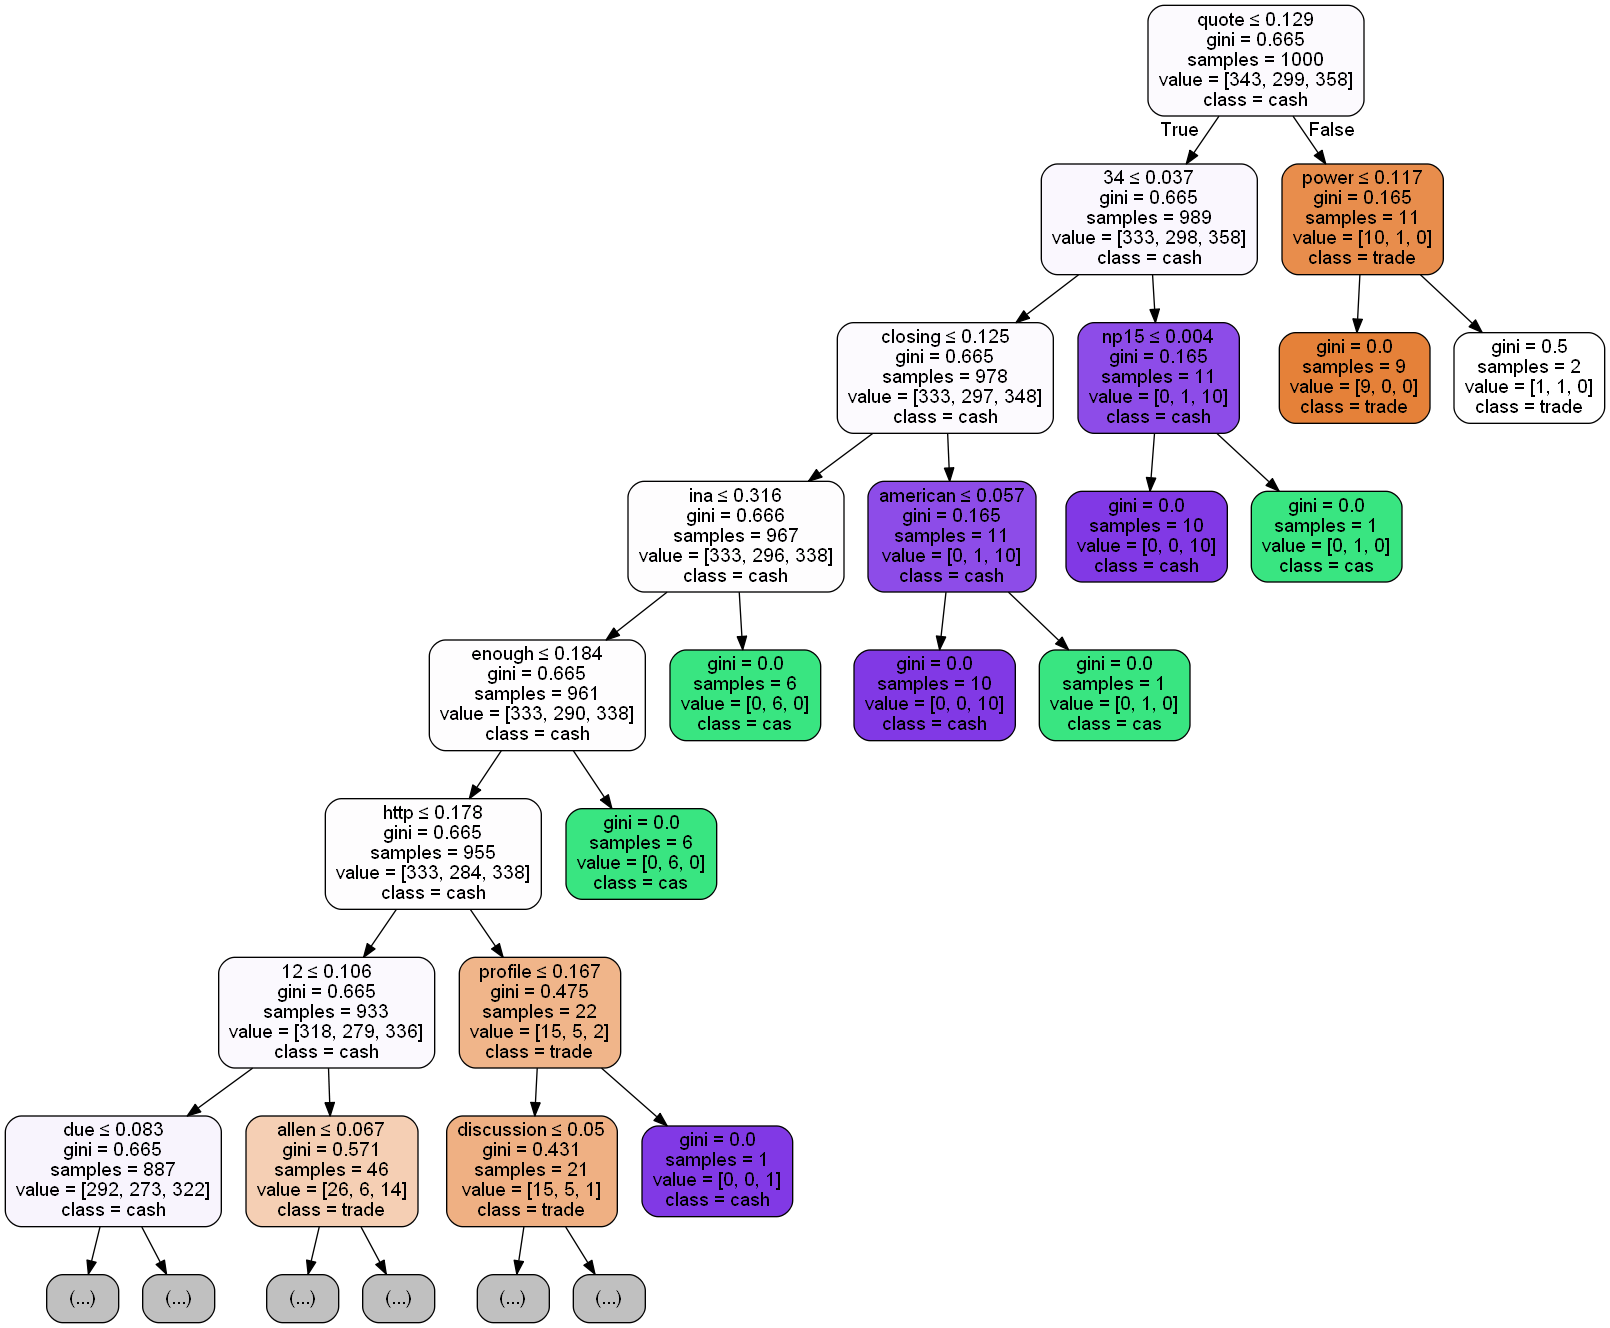

In [27]:
# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8
os.environ['PATH'] += os.pathsep + 'C:/Users/jia yi/.conda/pkgs/graphviz-2.38.0-h6538335_1011/Library/bin/graphviz'
# 'C:/Users/jia yi/.conda/pkgs/graphviz-2.38.0-h6538335_1011/Library/bin' + \
dot_data = StringIO()

# export as a dot file
export_graphviz(clf, out_file = 'output/decisionTree.dot',
               class_names = Y.unique(),
               feature_names = XFeature,
               rounded= True, proportion = False,
               filled = True, special_characters = True, max_depth = 7)

# from subprocess import call
# call(['dot','-Tpng','output/decisionTree.dot','-o','decisionTree.png','-Gdpi=600'])

# create image in png
with open('output/decisionTree.dot') as f:
    dot_data = f.readlines()
    dot_data = '\n'.join(dot_data) # list to str
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())




# this point and below is testing codes

In [8]:
XFeature

['00',
 '000',
 '000000000000935',
 '000000000001282',
 '000000000009659',
 '000000000021442',
 '000066',
 '000119',
 '0004',
 '0009',
 '000mmbtu',
 '001',
 '0010',
 '005',
 '006',
 '008',
 '00am',
 '00pm',
 '01',
 '0100',
 '010129_audit_index',
 '013',
 '014',
 '0177',
 '018',
 '0184',
 '019',
 '01cen906',
 '02',
 '024',
 '02cen001',
 '03',
 '030',
 '03pm',
 '04',
 '040',
 '0413',
 '05',
 '050',
 '052',
 '0597',
 '06',
 '0600',
 '0625',
 '0643',
 '06nov',
 '07',
 '075',
 '076',
 '079',
 '07nov',
 '08',
 '081',
 '084',
 '0852',
 '0870',
 '09',
 '090',
 '0901',
 '091',
 '0910',
 '09123',
 '0913259',
 '0913873',
 '0914236',
 '092',
 '0928',
 '093',
 '09320',
 '09365',
 '0937041',
 '09391',
 '094',
 '09415',
 '0949',
 '095',
 '0956',
 '096042',
 '096064',
 '0962',
 '09713',
 '098010',
 '0981',
 '0981503886',
 '09853',
 '099',
 '09advertise',
 '09amex',
 '09arg',
 '09august',
 '09austr',
 '09australia',
 '09authorities',
 '09avista',
 '09bear',
 '09both',
 '09braz',
 '09buzz',
 '09can',
 '

In [11]:
corpus


["traveling business meeting take fun trip especially prepare presentation would suggest holding business plan meeting take trip without formal business meeting would even try get honest opinion whether trip even desired necessary far business meeting think would productive try stimulate discussion across different group working often presenter speaks others quiet waiting turn meeting might better held round table discussion format suggestion go austin play golf rent ski boat jet ski 's flying somewhere take much time",
 'test successful way go',
 'patti example scheduling group plus thought change need made phillip randy send schedule salary level everyone',
 "let 's shoot tuesday 11:45",
 'greg either next tuesday thursday phillip',
 'john lavorato phillip allen thank help frank ermis please cc following distribution list update keith holst kholst enron.com mike grigsby mike.grigsby enron.com phillip allen pallen enron.com monique sanchez',
 'morning 10 11:30',
 "dns 151.164.1.8 rc 1

In [13]:
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
X = vectorizer.fit_transform(corpus)
X

<1000x8329 sparse matrix of type '<class 'numpy.float64'>'
	with 59380 stored elements in Compressed Sparse Row format>

In [16]:
print(vectorizer.get_feature_names())

['00', '000', '000000000000935', '000000000001282', '000000000009659', '000000000021442', '000066', '000119', '0004', '0009', '000mmbtu', '001', '0010', '005', '006', '008', '00am', '00pm', '01', '0100', '010129_audit_index', '013', '014', '0177', '018', '0184', '019', '01cen906', '02', '024', '02cen001', '03', '030', '03pm', '04', '040', '0413', '05', '050', '052', '0597', '06', '0600', '0625', '0643', '06nov', '07', '075', '076', '079', '07nov', '08', '081', '084', '0852', '0870', '09', '090', '0901', '091', '0910', '09123', '0913259', '0913873', '0914236', '092', '0928', '093', '09320', '09365', '0937041', '09391', '094', '09415', '0949', '095', '0956', '096042', '096064', '0962', '09713', '098010', '0981', '0981503886', '09853', '099', '09advertise', '09amex', '09arg', '09august', '09austr', '09australia', '09authorities', '09avista', '09bear', '09both', '09braz', '09buzz', '09can', '09canada', '09capital', '09change', '09click', '09close', '09coal', '09cob', '09commodities', '09co